# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [0]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [0]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [3]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [4]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [5]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [0]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [0]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [6]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [0]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [7]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [8]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())
project_data['essay']= preprocessed_essays

100%|██████████| 109248/109248 [01:21<00:00, 1335.05it/s]


In [0]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [9]:
# similarly you can preprocess the titles also
# Similarly you can vectorize for title also
from tqdm import tqdm
preprocessed_title = []
print(project_data['project_title'].values[0])
print(".......................")
for i in project_data['project_title']:
    i = decontracted(i)
    i = i.replace(':', ' ')
    i = i.replace('/', ' ')
    i = i.replace(',', ' ')
    i = i.replace('(', ' ')
    i = i.replace(')', ' ')
    i = i.replace('!', ' ')
    i = re.sub('[^A-Za-z0-9]+', ' ', i)
    # https://gist.github.com/sebleier/554280
    i = ' '.join(e for e in i.split() if e not in stopwords)
    preprocessed_title.append(i.lower().strip())
project_data['project_title']=preprocessed_title

Educational Support for English Learners at Home
.......................


## 1.5 Preparing data for models

In [0]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [0]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [0]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [0]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [0]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


In [0]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

#### 1.5.2.2 TFIDF vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16623)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:27<00:00, 3953.36it/s]


109248
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [03:22<00:00, 539.44it/s]


109248
300


In [0]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [10]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

In [0]:
price_standardized

array([[0.00098843, 0.00191166, 0.00330448, ..., 0.00153418, 0.00046704,
        0.00070265]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [0]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 16623)
(109248, 1)


In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109248, 16663)

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [0]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

D:\installed\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [68]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
# prefix=project_data['teacher_prefix']
# x=['Mrs.', 'Mr.', 'Ms.', 'Teacher', 'Dr.']
# for i in prefix:
# x=prefix.str.replace('Mr.','0')
# x


In [11]:
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
project_data.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   

                               project_title  \
0  educational support english learners home   

                                     project_essay_1  \
0  My students are English learners that are work...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   

   teacher_number_of_previously_posted_projects   clean_categories  \
0                                             0  Literacy_Language   

  clean_subcategories                                              essay  \
0        ESL Literacy  my students english learners working english s...   

   price  quantity  
0  154.6        23

In [12]:
x = project_data
x.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'quantity'], dtype=object)

In [13]:
x.shape,y.shape

((109248, 19), (109248,))

In [14]:
# split data into train ,test.cv
x=x.values
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=2)
for train_index, test_index in tscv.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
tscv = TimeSeriesSplit(n_splits=2)
for train_index, cv_index in tscv.split(X_train):
    X_train, X_cv = x[train_index], x[cv_index]
    y_train, y_cv = y[train_index], y[cv_index]

In [15]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_cv.shape,y_cv.shape

((48555, 19), (48555,), (36416, 19), (36416,), (24277, 19), (24277,))

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [16]:
#catogorical features: school_state
# X_train_state = X_train[:,4]
# X_cv_state = X_cv[:,4]
# X_test_state = X_test[:,4]
# X_train_state.shape,X_cv_state.shape,X_test_state.shape
#one hot encoding the catogorical features: school_state
state=np.unique(project_data['school_state'].values)
state
vectorizer = CountVectorizer(vocabulary=list(state), lowercase=False, binary=True)
vectorizer.fit(X_train[:,4]) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train[:,4])
X_cv_state_ohe = vectorizer.transform(X_cv[:,4])
X_test_state_ohe = vectorizer.transform(X_test[:,4])
print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(48555, 51) (48555,)
(24277, 51) (24277,)
(36416, 51) (36416,)
['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [17]:
#catogorical features: clean_categories
# X_train_clean_categories = X_train[:,14]
# X_cv_clean_categories = X_cv[:,14]
# X_test_clean_categories = X_test[:,14]
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train[:,14])
# # we use the fitted CountVectorizer to convert the text to vector
X_train_clean_categories_ohe = vectorizer.transform(X_train[:,14])
X_cv_clean_categories_ohe = vectorizer.transform(X_cv[:,14])
X_test_clean_categories_ohe = vectorizer.transform(X_test[:,14])
print("After vectorizations")
print(X_train_clean_categories_ohe.shape, y_train.shape)
print(X_cv_clean_categories_ohe.shape, y_cv.shape)
print(X_test_clean_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(48555, 9) (48555,)
(24277, 9) (24277,)
(36416, 9) (36416,)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


In [18]:
#catogorical features: clean_subcategories
# X_train_clean_subcategories = X_train[:,15]
# X_cv_clean_subcategories = X_cv[:,15]
# X_test_clean_subcategories = X_test[:,15]
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train[:,15])
# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcategories_ohe = vectorizer.transform(X_train[:,15])
X_cv_clean_subcategories_ohe = vectorizer.transform(X_cv[:,15])
X_test_clean_subcategories_ohe = vectorizer.transform(X_test[:,15])
print("After vectorizations")
print(X_train_clean_subcategories_ohe.shape, y_train.shape)
print(X_cv_clean_subcategories_ohe.shape, y_cv.shape)
print(X_test_clean_subcategories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(48555, 9) (48555,)
(24277, 9) (24277,)
(36416, 9) (36416,)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


In [19]:
#catogorical features: project_grade_category
# X_train_grade = X_train[:,6]
# X_cv_grade = X_cv[:,6]
# X_test_grade = X_test[:,6]
#one hot encoding the catogorical features:project_grade_category

grade=project_data['project_grade_category'].unique()
vectorizer = CountVectorizer(vocabulary=list(grade), lowercase=False, binary=True)
vectorizer.fit(X_train[:,6]) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train[:,6])
X_cv_grade_ohe = vectorizer.transform(X_cv[:,6])
X_test_grade_ohe = vectorizer.transform(X_test[:,6])

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(48555, 4) (48555,)
(24277, 4) (24277,)
(36416, 4) (36416,)
['Grades PreK-2', 'Grades 6-8', 'Grades 3-5', 'Grades 9-12']


In [20]:
#catogorical features: teacher_prefix
# X_train_teacher = X_train[:,3]
# X_cv_teacher = X_cv[:,3]
# X_test_teacher= X_test[:,3]
#one hot encoding the catogorical features:teacher_prefix
prefix=project_data['teacher_prefix'].unique()
#https://stackoverflow.com/questions/21011777/how-can-i-remove-nan-from-list-python-numpy
cleanedprefix = [x for x in prefix if str(x) != 'nan']
cleanedprefix
vectorizer = CountVectorizer(vocabulary=list(cleanedprefix), lowercase=False, binary=True)
vectorizer.fit(X_train[:,3].astype('U')) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train[:,3].astype('U'))
X_cv_teacher_ohe = vectorizer.transform(X_cv[:,3].astype('U'))
X_test_teacher_ohe = vectorizer.transform(X_test[:,3].astype('U'))

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(48555, 5) (48555,)
(24277, 5) (24277,)
(36416, 5) (36416,)
['Mrs.', 'Mr.', 'Ms.', 'Teacher', 'Dr.']


In [21]:
#encoding teacher_number_of_previously_posted_projects : numerical

from sklearn.preprocessing import StandardScaler

price_scalar = StandardScaler()
price_scalar.fit(X_train[:,13].reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
previously_posted_projects_standardized_train = price_scalar.transform(X_train[:,13].reshape(-1, 1))
previously_posted_projects_standardized_cv = price_scalar.transform(X_cv[:,13].reshape(-1, 1))
previously_posted_projects_standardized_test = price_scalar.transform(X_test[:,13].reshape(-1,1))

C:\Users\Bhumiben.Patel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype object was converted to float64 by StandardScaler.



Mean : 11.257069302852436, Standard deviation : 28.106157990742027


C:\Users\Bhumiben.Patel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype object was converted to float64 by StandardScaler.

C:\Users\Bhumiben.Patel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype object was converted to float64 by StandardScaler.

C:\Users\Bhumiben.Patel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype object was converted to float64 by StandardScaler.



In [22]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train[:,17].reshape(-1,1))

price_train = normalizer.transform(X_train[:,17].reshape(-1,1))
price_cv = normalizer.transform(X_cv[:,17].reshape(-1,1))
price_test= normalizer.transform(X_test[:,17].reshape(-1,1))

print("After vectorizations")
print(price_train.shape, y_train.shape)
print(price_cv.shape, y_cv.shape)
print(price_test.shape, y_test.shape)
print("="*100)

After vectorizations
(48555, 1) (48555,)
(24277, 1) (24277,)
(36416, 1) (36416,)


In [23]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train[:,18].reshape(-1,1))

quantity_train = normalizer.transform(X_train[:,18].reshape(-1,1))
quantity_cv = normalizer.transform(X_cv[:,18].reshape(-1,1))
quantity_test= normalizer.transform(X_test[:,18].reshape(-1,1))

print("After vectorizations")
print(quantity_train.shape, y_train.shape)
print(quantity_cv.shape, y_cv.shape)
print(quantity_test.shape, y_test.shape)
print("="*100)


After vectorizations
(48555, 1) (48555,)
(24277, 1) (24277,)
(36416, 1) (36416,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [24]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

BOW for essay and project title

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))
vectorizer.fit(X_train[:,16]) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train[:,16])
X_cv_essay_bow = vectorizer.transform(X_cv[:,16])
X_test_essay_bow = vectorizer.transform(X_test[:,16])

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)
bow_eassy=vectorizer.get_feature_names()

After vectorizations
(48555, 1570632) (48555,)
(24277, 1570632) (24277,)
(36416, 1570632) (36416,)


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train[:,7]) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train[:,7])
X_cv_title_bow = vectorizer.transform(X_cv[:,7])
X_test_title_bow = vectorizer.transform(X_test[:,7])

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)
print("="*100)
bow_title=vectorizer.get_feature_names()

After vectorizations
(48555, 11897) (48555,)
(24277, 11897) (24277,)
(36416, 11897) (36416,)


TFIDF for essay and project title

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train[:,16])

X_train_eassy_tfidf = vectorizer.transform(X_train[:,16])
X_cv_eassy_tfidf = vectorizer.transform(X_cv[:,16])
X_test_eassy_tfidf = vectorizer.transform(X_test[:,16])

print("After vectorizations")
print(X_train_eassy_tfidf.shape, y_train.shape)
print(X_cv_eassy_tfidf.shape, y_cv.shape)
print(X_test_eassy_tfidf.shape, y_test.shape)
print("="*100)
tfidf_eassy=vectorizer.get_feature_names()

After vectorizations
(48555, 40870) (48555,)
(24277, 40870) (24277,)
(36416, 40870) (36416,)


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2),max_features=5000)
vectorizer.fit(X_train[:,7])

X_train_title_tfidf = vectorizer.transform(X_train[:,7])
X_cv_title_tfidf = vectorizer.transform(X_cv[:,7])
X_test_title_tfidf = vectorizer.transform(X_test[:,7])

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)
tfidf_title=vectorizer.get_feature_names()

After vectorizations
(48555, 3732) (48555,)
(24277, 3732) (24277,)
(36416, 3732) (36416,)


AVG W2V for essay and project title

In [74]:
import pickle
with open('glove_vectors', 'rb') as f:
    
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [75]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train[:,16]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))

# compute average word2vec for each review.
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test[:,16]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)


avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv[:,16]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))

100%|██████████| 48555/48555 [00:18<00:00, 2571.85it/s]


48555


100%|██████████| 24277/24277 [00:09<00:00, 2661.24it/s]


24277


In [76]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train[:,7]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train_title.append(vector)

print(len(avg_w2v_vectors_train_title))

# compute average word2vec for each review.
avg_w2v_vectors_test_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test[:,7]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test_title.append(vector)

print(len(avg_w2v_vectors_test_title))

avg_w2v_vectors_cv_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv[:,7]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv_title.append(vector)

print(len(avg_w2v_vectors_cv_title))

100%|██████████| 48555/48555 [00:01<00:00, 46120.71it/s]


48555


100%|██████████| 36416/36416 [00:01<00:00, 33894.72it/s]


36416


100%|██████████| 24277/24277 [00:00<00:00, 42287.43it/s]


24277


TFIDF W2V for essay and project title

In [77]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train[:,16])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [78]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_eassy_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train[:,16]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_eassy_train.append(vector)

print(len(tfidf_w2v_vectors_eassy_train))
print(len(tfidf_w2v_vectors_eassy_train[0]))


tfidf_w2v_vectors_eassy_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test[:,16]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_eassy_test.append(vector)

print(len(tfidf_w2v_vectors_eassy_test))
print(len(tfidf_w2v_vectors_eassy_test[0]))

tfidf_w2v_vectors_eassy_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv[:,16]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_eassy_cv.append(vector)

print(len(tfidf_w2v_vectors_eassy_cv))
print(len(tfidf_w2v_vectors_eassy_cv[0]))


100%|██████████| 48555/48555 [02:30<00:00, 322.22it/s]


48555
300


100%|██████████| 36416/36416 [01:53<00:00, 320.58it/s]


36416
300


100%|██████████| 24277/24277 [01:12<00:00, 333.45it/s]


24277
300


In [79]:
# Similarly you can vectorize for title also
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train[:,7])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [80]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train[:,7]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_train.append(vector)

print(len(tfidf_w2v_vectors_title_train))
print(len(tfidf_w2v_vectors_title_train[0]))


tfidf_w2v_vectors_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test[:,7]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_test.append(vector)

print(len(tfidf_w2v_vectors_title_test))

tfidf_w2v_vectors_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv[:,7]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_cv.append(vector)

print(len(tfidf_w2v_vectors_title_cv))

100%|██████████| 48555/48555 [00:02<00:00, 20172.41it/s]


48555
300


100%|██████████| 36416/36416 [00:01<00:00, 18975.56it/s]


36416


100%|██████████| 24277/24277 [00:01<00:00, 21176.73it/s]


24277


In [81]:
# Please write all the code with proper documentation
# X_train_state.shape,X_train_clean_categories.shape,X_train_clean_subcategories.shape,X_train_grade.shape,X_train_teacher.shape,previously_posted_projects_standardized_train.shape,price_train.shape,quantity_train.shape,X_train_essay_bow.shape,X_train_title_bow.shape

<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [66]:
from scipy.sparse import hstack
from sklearn.metrics import accuracy_score
X_tr_st1 = hstack((X_train_state_ohe,X_train_clean_categories_ohe,X_train_clean_subcategories_ohe,X_train_grade_ohe,
               X_train_teacher_ohe,previously_posted_projects_standardized_train,price_train,quantity_train,X_train_essay_bow,X_train_title_bow)).tocsr()
X_cv_st1 = hstack((X_cv_state_ohe,X_cv_clean_categories_ohe,X_cv_clean_subcategories_ohe,X_cv_grade_ohe,
               X_cv_teacher_ohe,previously_posted_projects_standardized_cv,price_cv,quantity_cv,X_cv_essay_bow,X_cv_title_bow)).tocsr()
X_te_st1 = hstack((X_test_state_ohe,X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_grade_ohe,
               X_test_teacher_ohe,previously_posted_projects_standardized_test,price_test,quantity_test,X_test_essay_bow,X_test_title_bow)).tocsr()

print("Final Data matrix")
print(X_tr_st1.shape, y_train.shape)
print(X_cv_st1.shape, y_cv.shape)
print(X_te_st1.shape, y_test.shape)
print("="*100)

Final Data matrix
(48555, 1582610) (48555,)
(24277, 1582610) (24277,)
(36416, 1582610) (36416,)


In [161]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred



  0%|          | 0/7 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [00:48<04:52, 48.69s/it]

 29%|██▊       | 2/7 [02:01<04:39, 55.83s/it]

 43%|████▎     | 3/7 [03:44<04:40, 70.08s/it]

 57%|█████▋    | 4/7 [10:56<08:56, 178.79s/it]

 71%|███████▏  | 5/7 [19:41<09:24, 282.42s/it]

 86%|████████▌ | 6/7 [30:16<06:28, 388.31s/it]

100%|██████████| 7/7 [38:38<00:00, 422.30s/it]

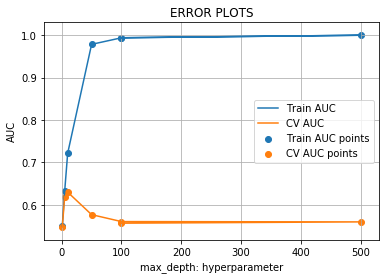

In [45]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
max_depth = [1, 5, 10, 50, 100, 500, 1000]
for i in tqdm(max_depth):
    clf = DecisionTreeClassifier(max_depth=i,class_weight="balanced")
    clf.fit(X_tr_st1,y_train)
    y_train_pred = batch_predict(clf, X_tr_st1)    
    y_cv_pred = batch_predict(clf, X_cv_st1)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(max_depth, train_auc, label='Train AUC')
plt.plot(max_depth, cv_auc, label='CV AUC')

plt.scatter(max_depth, train_auc, label='Train AUC points')
plt.scatter(max_depth, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()



  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [10:39<31:58, 639.56s/it]

 50%|█████     | 2/4 [20:27<20:48, 624.13s/it]

 75%|███████▌  | 3/4 [28:13<09:36, 576.54s/it]

100%|██████████| 4/4 [32:48<00:00, 486.10s/it]

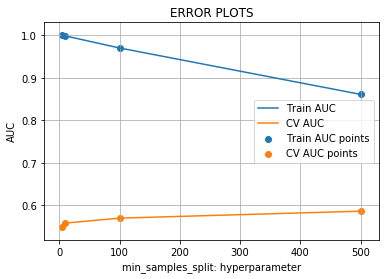

In [46]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
min_samples_split = [5, 10, 100, 500]
for i in tqdm(min_samples_split):
    clf = DecisionTreeClassifier(min_samples_split=i,class_weight="balanced")
    clf.fit(X_tr_st1,y_train)
    y_train_pred = batch_predict(clf, X_tr_st1)    
    y_cv_pred = batch_predict(clf, X_cv_st1)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(min_samples_split, train_auc, label='Train AUC')
plt.plot(min_samples_split, cv_auc, label='CV AUC')

plt.scatter(min_samples_split, train_auc, label='Train AUC points')
plt.scatter(min_samples_split, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("min_samples_split: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

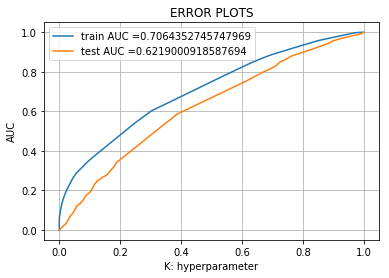

In [49]:
from sklearn.metrics import roc_curve, auc


clf = DecisionTreeClassifier(min_samples_split=100,max_depth=10,class_weight="balanced")
clf.fit(X_tr_st1,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, X_tr_st1)    
y_test_pred = batch_predict(clf, X_te_st1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [50]:
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24931080598069888 for threshold 0.428


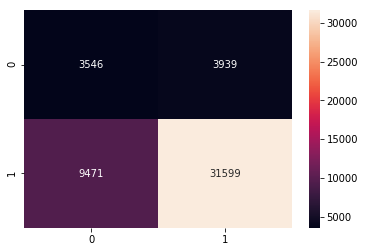

In [51]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
tr=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
ax = sns.heatmap(tr,annot=True,fmt="d")

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.23779699285896158 for threshold 0.447


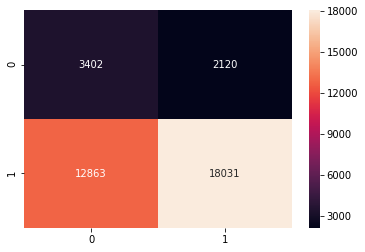

In [52]:
print("Test confusion matrix")
te=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
ax = sns.heatmap(te,annot=True,fmt="d")

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

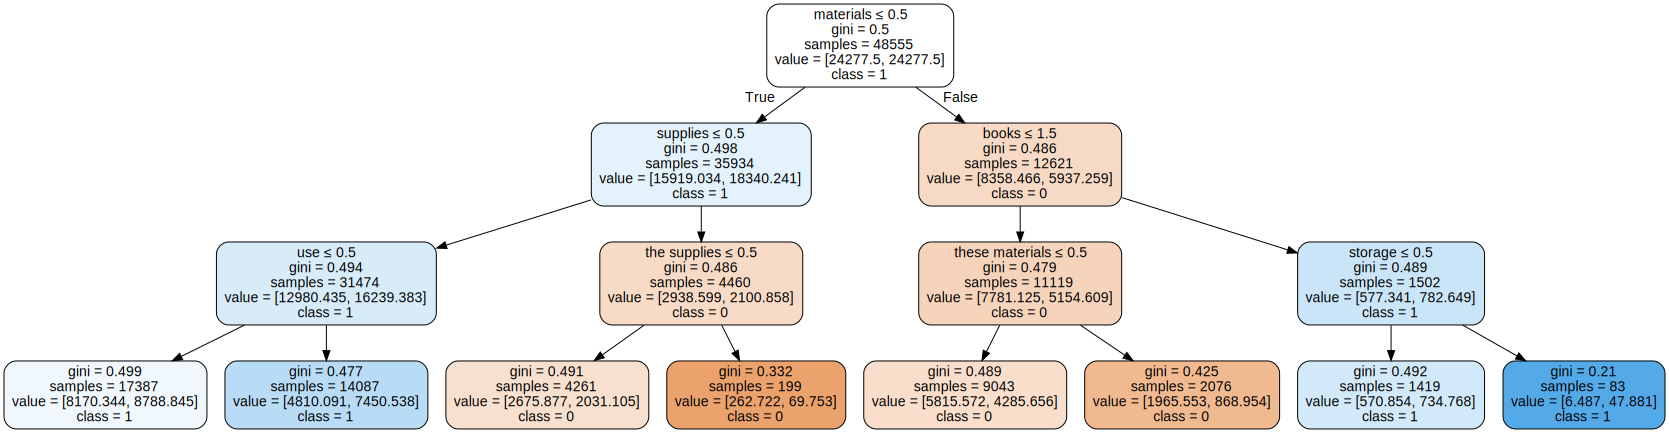

In [48]:
# Please write all the code with proper documentation
import graphviz 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(max_depth=3,class_weight="balanced")
clf.fit(X_train_essay_bow,y_train)
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=bow_eassy,class_names=['0','1'],filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph


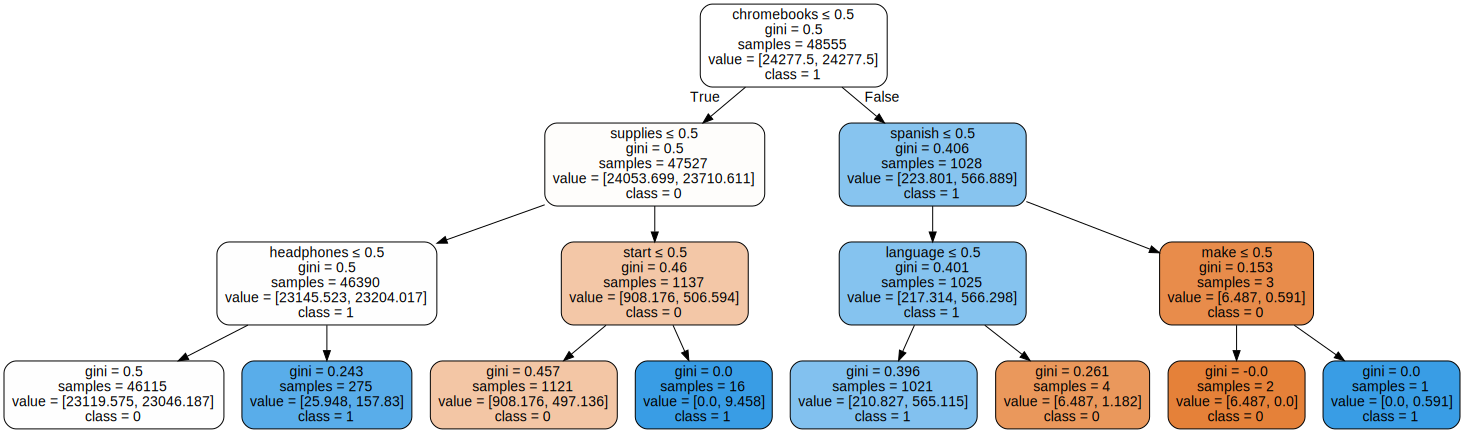

In [49]:
import graphviz 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(max_depth=3,class_weight="balanced")
clf.fit(X_train_title_bow,y_train)
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=bow_title,class_names=['0','1'],filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [26]:
from scipy.sparse import hstack
X_tr_st2 = hstack((X_train_state_ohe,X_train_clean_categories_ohe,X_train_clean_subcategories_ohe,X_train_grade_ohe,
               X_train_teacher_ohe,previously_posted_projects_standardized_train,price_train,quantity_train,X_train_eassy_tfidf,X_train_title_tfidf)).tocsr()

X_te_st2 = hstack((X_test_state_ohe,X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_grade_ohe,
               X_test_teacher_ohe,previously_posted_projects_standardized_test,price_test,quantity_test,X_test_title_tfidf,X_test_eassy_tfidf)).tocsr()
X_cv_st2 = hstack((X_cv_state_ohe,X_cv_clean_categories_ohe,X_cv_clean_subcategories_ohe,X_cv_grade_ohe,
               X_cv_teacher_ohe,previously_posted_projects_standardized_cv,price_cv,quantity_cv,X_cv_eassy_tfidf,X_cv_title_tfidf)).tocsr()

print("Final Data matrix")
print(X_tr_st2.shape, y_train.shape)
print(X_cv_st2.shape, y_cv.shape)
print(X_te_st2.shape, y_test.shape)

print("="*100)

Final Data matrix
(48555, 44683) (48555,)
(24277, 44683) (24277,)
(36416, 44683) (36416,)




  0%|          | 0/7 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [00:01<00:11,  1.90s/it]

 29%|██▊       | 2/7 [00:07<00:14,  2.94s/it]

 43%|████▎     | 3/7 [00:20<00:23,  5.95s/it]

 57%|█████▋    | 4/7 [01:29<01:15, 25.07s/it]

 71%|███████▏  | 5/7 [02:58<01:28, 44.10s/it]

 86%|████████▌ | 6/7 [04:35<01:00, 60.13s/it]

100%|██████████| 7/7 [06:14<00:00, 71.66s/it]

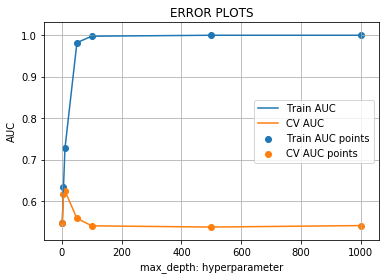

In [57]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
max_depth = [1, 5, 10, 50, 100, 500, 1000]
for i in tqdm(max_depth):
    clf = DecisionTreeClassifier(max_depth=i,class_weight="balanced")
    clf.fit(X_tr_st2,y_train)
    y_train_pred = batch_predict(clf, X_tr_st2)    
    y_cv_pred = batch_predict(clf, X_cv_st2)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(max_depth, train_auc, label='Train AUC')
plt.plot(max_depth, cv_auc, label='CV AUC')

plt.scatter(max_depth, train_auc, label='Train AUC points')
plt.scatter(max_depth, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()



  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [01:37<04:51, 97.07s/it]

 50%|█████     | 2/4 [03:14<03:14, 97.21s/it]

 75%|███████▌  | 3/4 [04:34<01:31, 92.00s/it]

100%|██████████| 4/4 [05:11<00:00, 75.62s/it]

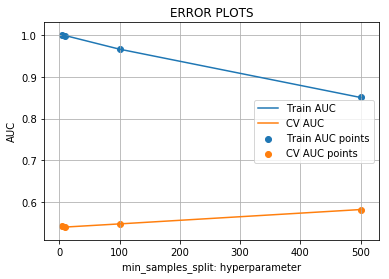

In [58]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
min_samples_split = [5, 10, 100, 500]
for i in tqdm(min_samples_split):
    clf = DecisionTreeClassifier(min_samples_split=i,class_weight="balanced")
    clf.fit(X_tr_st2,y_train)
    y_train_pred = batch_predict(clf, X_tr_st2)    
    y_cv_pred = batch_predict(clf, X_cv_st2)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(min_samples_split, train_auc, label='Train AUC')
plt.plot(min_samples_split, cv_auc, label='CV AUC')

plt.scatter(min_samples_split, train_auc, label='Train AUC points')
plt.scatter(min_samples_split, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("min_samples_split: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

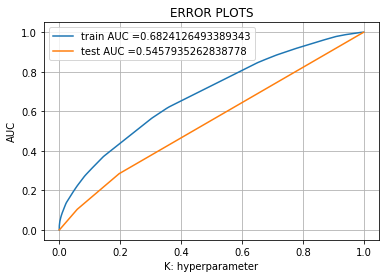

In [85]:
###### from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(min_samples_split=110,max_depth=8,class_weight="balanced")
clf.fit(X_tr_st2,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, X_tr_st2)    
y_test_pred = batch_predict(clf, X_te_st2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [86]:
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.23363583100290986 for threshold 0.438


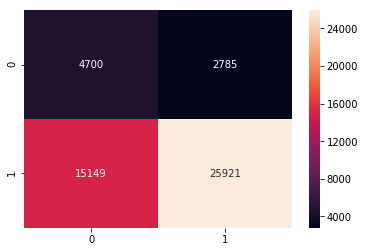

In [87]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
tr=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
ax = sns.heatmap(tr,annot=True,fmt="d")

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.1586476195248639 for threshold 0.926


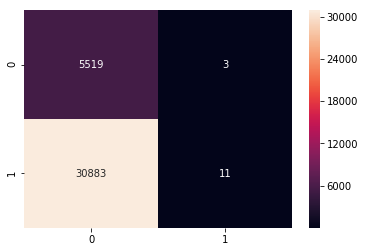

In [88]:
print("Test confusion matrix")
te=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
ax = sns.heatmap(te,annot=True,fmt="d")

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

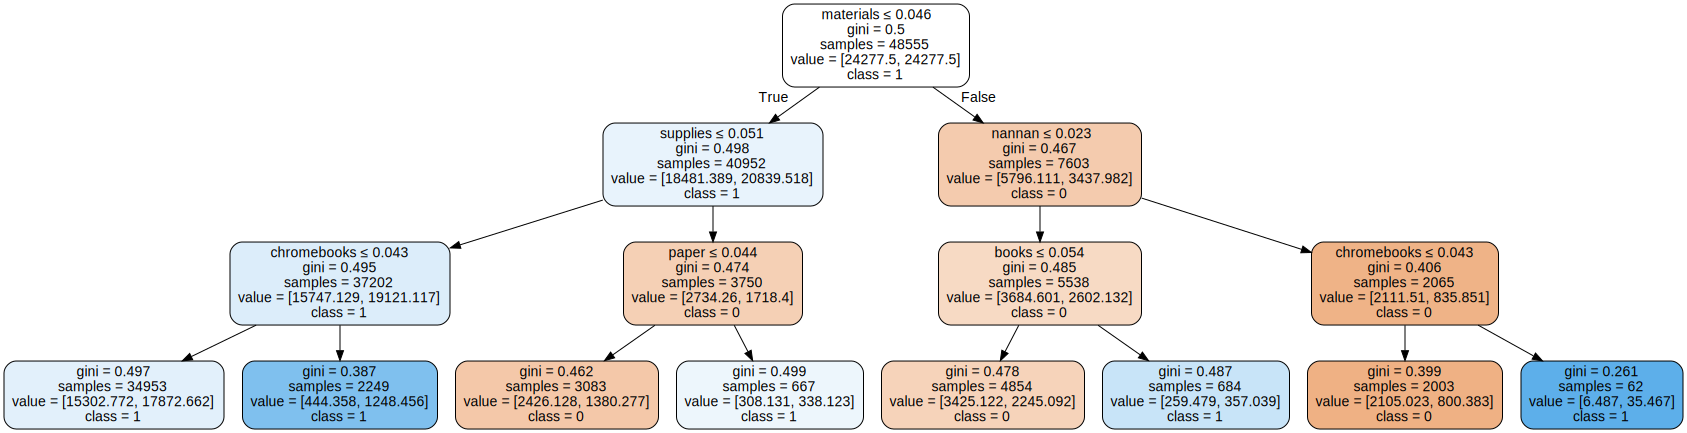

In [51]:
# Please write all the code with proper documentation
import graphviz 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(max_depth=3,class_weight="balanced")
clf.fit(X_train_eassy_tfidf,y_train)
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=tfidf_eassy,class_names=['0','1'],filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

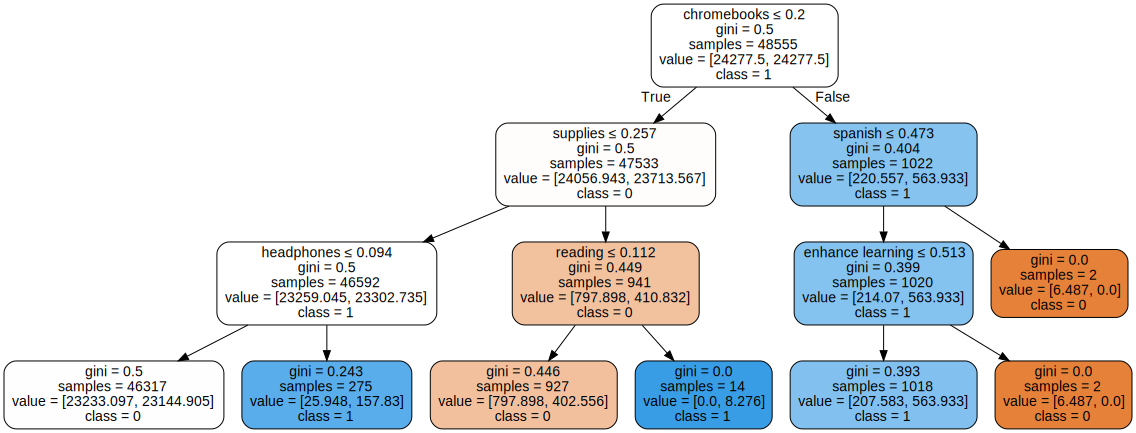

In [52]:
import graphviz 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(max_depth=3,class_weight="balanced")
clf.fit(X_train_title_tfidf,y_train)
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=tfidf_title,class_names=['0','1'],filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [90]:
from scipy.sparse import hstack
X_tr_st3 = hstack((X_train_state_ohe,X_train_clean_categories_ohe,X_train_clean_subcategories_ohe,X_train_grade_ohe,
               X_train_teacher_ohe,previously_posted_projects_standardized_train,price_train,quantity_train,avg_w2v_vectors_train_title,avg_w2v_vectors_train)).tocsr()

X_te_st3 = hstack((X_test_state_ohe,X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_grade_ohe,
               X_test_teacher_ohe,previously_posted_projects_standardized_test,price_test,quantity_test,avg_w2v_vectors_test_title,avg_w2v_vectors_test)).tocsr()
X_cv_st3 = hstack((X_cv_state_ohe,X_cv_clean_categories_ohe,X_cv_clean_subcategories_ohe,X_cv_grade_ohe,
               X_cv_teacher_ohe,previously_posted_projects_standardized_cv,price_cv,quantity_cv,avg_w2v_vectors_cv_title,avg_w2v_vectors_cv)).tocsr()

print("Final Data matrix")
print(X_tr_st3.shape, y_train.shape)
print(X_cv_st3.shape, y_cv.shape)
print(X_te_st3.shape, y_test.shape)
print("="*100)

Final Data matrix
(48555, 681) (48555,)
(24277, 681) (24277,)
(36416, 681) (36416,)




  0%|          | 0/7 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [00:05<00:35,  5.92s/it]

 29%|██▊       | 2/7 [00:29<00:56, 11.31s/it]

 43%|████▎     | 3/7 [01:37<01:52, 28.17s/it]

 57%|█████▋    | 4/7 [04:27<03:31, 70.63s/it]

 71%|███████▏  | 5/7 [07:22<03:23, 101.94s/it]

 86%|████████▌ | 6/7 [10:21<02:05, 125.26s/it]

100%|██████████| 7/7 [13:21<00:00, 141.51s/it]

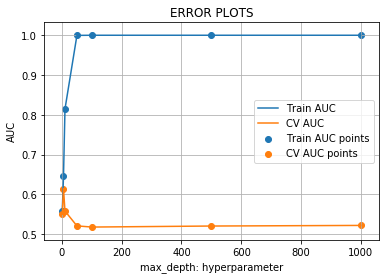

In [60]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
max_depth = [1, 5, 10, 50, 100, 500, 1000]
for i in tqdm(max_depth):
    clf = DecisionTreeClassifier(max_depth=i,class_weight="balanced")
    clf.fit(X_tr_st3,y_train)
    y_train_pred = batch_predict(clf, X_tr_st3)    
    y_cv_pred = batch_predict(clf, X_cv_st3)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(max_depth, train_auc, label='Train AUC')
plt.plot(max_depth, cv_auc, label='CV AUC')

plt.scatter(max_depth, train_auc, label='Train AUC points')
plt.scatter(max_depth, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()



  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [03:00<09:01, 180.36s/it]

 50%|█████     | 2/4 [05:54<05:57, 178.59s/it]

 75%|███████▌  | 3/4 [08:32<02:52, 172.32s/it]

100%|██████████| 4/4 [09:38<00:00, 140.41s/it]

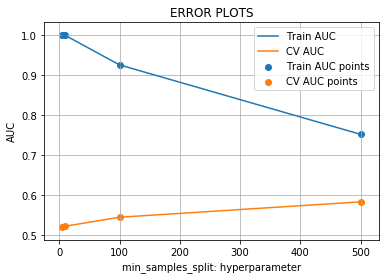

In [61]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
min_samples_split = [5, 10, 100, 500]
for i in tqdm(min_samples_split):
    clf = DecisionTreeClassifier(min_samples_split=i,class_weight="balanced")
    clf.fit(X_tr_st3,y_train)
    y_train_pred = batch_predict(clf, X_tr_st3)    
    y_cv_pred = batch_predict(clf, X_cv_st3)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(min_samples_split, train_auc, label='Train AUC')
plt.plot(min_samples_split, cv_auc, label='CV AUC')

plt.scatter(min_samples_split, train_auc, label='Train AUC points')
plt.scatter(min_samples_split, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("min_samples_split: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [98]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

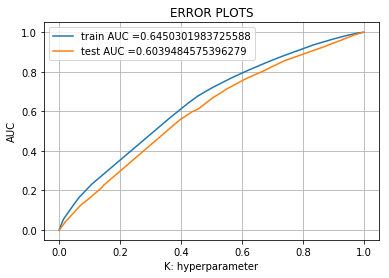

In [97]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(min_samples_split=100,max_depth=5,class_weight="balanced")
clf.fit(X_tr_st3,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, X_tr_st3)    
y_test_pred = batch_predict(clf, X_te_st3)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [99]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999963855566845 for threshold -0.764


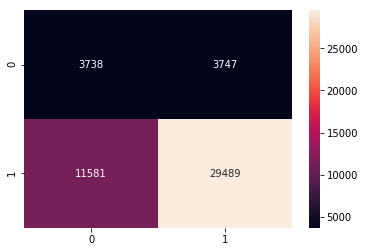

In [100]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
tr=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
ax = sns.heatmap(tr,annot=True,fmt="d")

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24996208901839548 for threshold -0.636


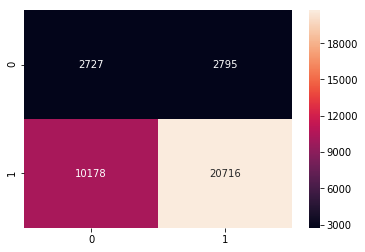

In [101]:
print("Test confusion matrix")
te=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
ax = sns.heatmap(te,annot=True,fmt="d")

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [102]:
# Please write all the code with proper documentation
from scipy.sparse import hstack
X_tr_st4 = hstack((X_train_state_ohe,X_train_clean_categories_ohe,X_train_clean_subcategories_ohe,X_train_grade_ohe,
               X_train_teacher_ohe,previously_posted_projects_standardized_train,price_train,quantity_train,tfidf_w2v_vectors_eassy_train,tfidf_w2v_vectors_title_train)).tocsr()
X_cv_st4 = hstack((X_cv_state_ohe,X_cv_clean_categories_ohe,X_cv_clean_subcategories_ohe,X_cv_grade_ohe,
               X_cv_teacher_ohe,previously_posted_projects_standardized_cv,price_cv,quantity_cv,tfidf_w2v_vectors_eassy_cv,tfidf_w2v_vectors_title_cv)).tocsr()

X_te_st4 = hstack((X_test_state_ohe,X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_grade_ohe,
               X_test_teacher_ohe,previously_posted_projects_standardized_test,price_test,quantity_test,tfidf_w2v_vectors_eassy_test,tfidf_w2v_vectors_title_test)).tocsr()

print("Final Data matrix")
print(X_tr_st4.shape, y_train.shape)
print(X_cv_st4.shape, y_cv.shape)
print(X_te_st4.shape, y_test.shape)
print("="*100)

Final Data matrix
(48555, 681) (48555,)
(24277, 681) (24277,)
(36416, 681) (36416,)




  0%|          | 0/7 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [00:05<00:35,  5.91s/it]

 29%|██▊       | 2/7 [00:30<00:56, 11.36s/it]

 43%|████▎     | 3/7 [01:39<01:55, 28.84s/it]

 57%|█████▋    | 4/7 [04:20<03:25, 68.42s/it]

 71%|███████▏  | 5/7 [07:05<03:14, 97.36s/it]

 86%|████████▌ | 6/7 [09:51<01:58, 118.04s/it]

100%|██████████| 7/7 [12:38<00:00, 132.76s/it]

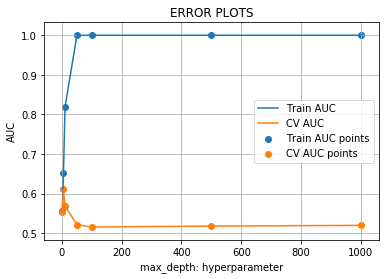

In [63]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
max_depth = [1, 5, 10, 50, 100, 500, 1000]
for i in tqdm(max_depth):
    clf = DecisionTreeClassifier(max_depth=i,class_weight="balanced")
    clf.fit(X_tr_st4,y_train)
    y_train_pred = batch_predict(clf, X_tr_st4)    
    y_cv_pred = batch_predict(clf, X_cv_st4)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(max_depth, train_auc, label='Train AUC')
plt.plot(max_depth, cv_auc, label='CV AUC')

plt.scatter(max_depth, train_auc, label='Train AUC points')
plt.scatter(max_depth, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()



  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [02:45<08:17, 165.85s/it]

 50%|█████     | 2/4 [05:24<05:27, 163.84s/it]

 75%|███████▌  | 3/4 [07:45<02:36, 156.89s/it]

100%|██████████| 4/4 [08:50<00:00, 129.25s/it]

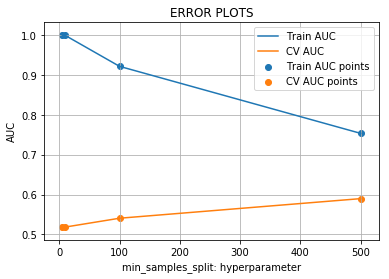

In [64]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
min_samples_split = [5, 10, 100, 500]
for i in tqdm(min_samples_split):
    clf = DecisionTreeClassifier(min_samples_split=i,class_weight="balanced")
    clf.fit(X_tr_st4,y_train)
    y_train_pred = batch_predict(clf, X_tr_st4)    
    y_cv_pred = batch_predict(clf, X_cv_st4)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(min_samples_split, train_auc, label='Train AUC')
plt.plot(min_samples_split, cv_auc, label='CV AUC')

plt.scatter(min_samples_split, train_auc, label='Train AUC points')
plt.scatter(min_samples_split, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("min_samples_split: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

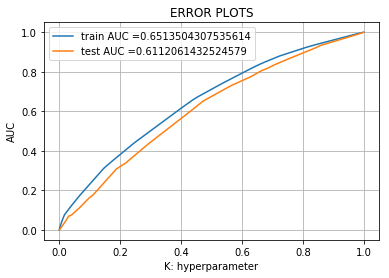

In [103]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(min_samples_split=100,max_depth=5,class_weight="balanced")
clf.fit(X_tr_st4,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, X_tr_st4)    
y_test_pred = batch_predict(clf, X_te_st4)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [104]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2495228533218742 for threshold 0.459


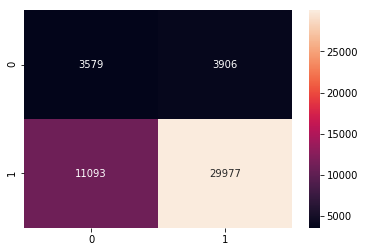

In [105]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
tr=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
ax = sns.heatmap(tr,annot=True,fmt="d")

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2498656718160449 for threshold 0.485


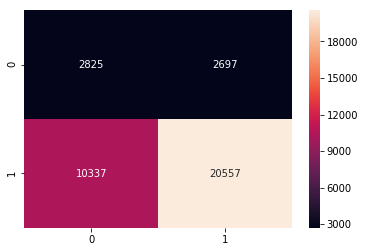

In [106]:
print("Test confusion matrix")
te=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
ax = sns.heatmap(te,annot=True,fmt="d")

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label


In [27]:
print("Final Data matrix")
print(X_tr_st2.shape, y_train.shape)
print(X_cv_st2.shape, y_cv.shape)
print(X_te_st2.shape, y_test.shape)

print("="*100)

Final Data matrix
(48555, 44683) (48555,)
(24277, 44683) (24277,)
(36416, 44683) (36416,)


In [29]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(class_weight="balanced")
clf.fit(X_tr_st2,y_train)
importances = clf.feature_importances_


In [42]:
indices=np.argsort(importances)[::-1][:5000]
#while converting saparce matrix to pdf i am gatting memory error so i took 20k row only
df = pd.DataFrame(X_tr_st2[:20000].toarray())

In [49]:
final_data=df.iloc[:, indices]

In [70]:
df_cv = pd.DataFrame(X_cv_st2[:10000].toarray())


In [73]:
final_data_cv=df_cv.iloc[:, indices]

In [71]:
df_test = pd.DataFrame(X_te_st2[:10000].toarray())

In [74]:
final_data_test=df_test.iloc[:, indices]

In [79]:
print(final_data.shape,final_data_cv.shape,final_data_test.shape)

(20000, 5000) (10000, 5000) (10000, 5000)


In [87]:
import scipy.sparse
dense_matrix = np.array(final_data.as_matrix(columns = None), dtype=bool).astype(np.int)
train_matrix = scipy.sparse.csr_matrix(dense_matrix)

In [91]:
dense_matrix = np.array(final_data_cv.as_matrix(columns = None), dtype=bool).astype(np.int)
cv_matrix = scipy.sparse.csr_matrix(dense_matrix)

In [124]:
dense_matrix = np.array(final_data_test.as_matrix(columns = None), dtype=bool).astype(np.int)
test_matrix = scipy.sparse.csr_matrix(dense_matrix)

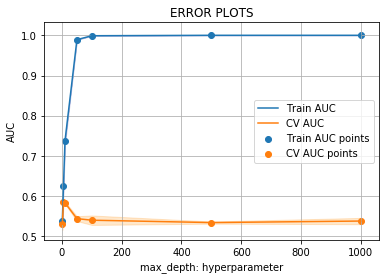

In [120]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(class_weight="balanced")
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000]}
clf = GridSearchCV(clf, parameters, cv=3, scoring='roc_auc')
clf.fit(train_matrix, y_train[:20000])

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(parameters['max_depth'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['max_depth'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['max_depth'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['max_depth'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['max_depth'], train_auc, label='Train AUC points')
plt.scatter(parameters['max_depth'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

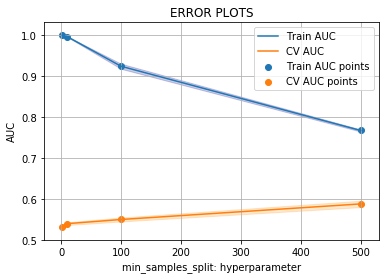

In [122]:
    from sklearn.model_selection import GridSearchCV

    clf = DecisionTreeClassifier(class_weight="balanced")
    parameters = {'min_samples_split': [2,10,100,500]}
    clf = GridSearchCV(clf, parameters, cv=3, scoring='roc_auc')
    clf.fit(train_matrix, y_train[:20000])

    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']

    plt.plot(parameters['min_samples_split'], train_auc, label='Train AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(parameters['min_samples_split'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

    plt.plot(parameters['min_samples_split'], cv_auc, label='CV AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(parameters['min_samples_split'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

    plt.scatter(parameters['min_samples_split'], train_auc, label='Train AUC points')
    plt.scatter(parameters['min_samples_split'], cv_auc, label='CV AUC points')


    plt.legend()
    plt.xlabel("min_samples_split: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()

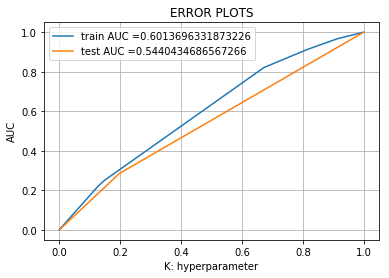

In [164]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(min_samples_split=100,max_depth=5,class_weight="balanced")
clf.fit(train_matrix,y_train[:20000])
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, train_matrix)    
y_test_pred = batch_predict(clf, test_matrix)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train[:20000], y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test[:20000], y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h1>3. Conclusion</h1>

In [168]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["vectorizer", "min_samples_split","max_depth","class_weight","train AUC","testAUC"]
x.add_row(['BOW','100','10',"balanced","0.7064","0.6210"])
x.add_row(['TFIDF','110','8',"balanced","0.6824","0.5457"])
x.add_row(['AVG W2V','100','5',"balanced","0.6439","0.6039"])
x.add_row(['TFIDF W2V','100','5',"balanced","0.6513",'0.6112'])
x.add_row(['TFIDF feature_importance','100',"5","balanced","0.6413","0.5440"])
print(x)

+--------------------------+-------------------+-----------+--------------+-----------+---------+
|        vectorizer        | min_samples_split | max_depth | class_weight | train AUC | testAUC |
+--------------------------+-------------------+-----------+--------------+-----------+---------+
|           BOW            |        100        |     10    |   balanced   |   0.7064  |  0.6210 |
|          TFIDF           |        110        |     8     |   balanced   |   0.6824  |  0.5457 |
|         AVG W2V          |        100        |     5     |   balanced   |   0.6439  |  0.6039 |
|        TFIDF W2V         |        100        |     5     |   balanced   |   0.6513  |  0.6112 |
| TFIDF feature_importance |        100        |     5     |   balanced   |   0.6413  |  0.5440 |
+--------------------------+-------------------+-----------+--------------+-----------+---------+


  step:

1.perform one hot encoding for categarical value and standalization aor normalization for numeric value column

2.on text data we perform BOW,TFIDF,AVF W2V,IFIDF W2V 

3.for categorical value we perform one hot encoding and for numarical value make it normalized. 

4.perform hypothesis tuning to find best min_sample_split and max_depth

5.after finding best min_sample_split and max_depth we plot train and test AUC  ROC curve.

6.find feature_importances_ score using DecisionTreeClassifier

7.after shorting importance value took 5000 value and find their indicies

8.after that we convert our train , test cv test to data frame. and find their apropeiate value and again conver to soarce matrix.

9.using Gridsearch CV done hypothesis tuning for min_sample_split and max_depth

10 and then plot ROC curve for that data.



concusion: for BOWVectorizer we are getting good train and test AUC value. feature importance on TfidfVectorizer we are getting less AUC compare to simple TFIDF vectorizer.